In [1]:
!python3 --version

Python 3.12.3


In [2]:
!pip install docling

In [4]:
import os

In [8]:
DATA_DIR = '/workspace/knowledge-base-chat-bot-develop/data/kzsk'

DOCUMENTS_DATA_DIR = os.path.join(DATA_DIR, 'documents')
QUESTIONS_DATA_DIR = os.path.join(DATA_DIR, 'questions')

DOCUMENTS_NAMES = os.listdir(DOCUMENTS_DATA_DIR)

In [6]:
os.listdir(DOCUMENTS_DATA_DIR)

['фторсилоксаны.pdf',
 'получение полиметилгидридметилсилоксана.pdf',
 'Гидросилилирование обзор.pdf',
 'RU2748330C2_20210524.pdf',
 'Ю.Д. Семчиков - Высокомолекулярные соединения,.pdf',
 '.ipynb_checkpoints']

In [4]:
os.listdir('/workspace/knowledge-base-chat-bot-develop/documents')

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/knowledge-base-chat-bot-develop/documents'

In [ ]:
documents = []

- Dolphin
- Abbyy
- pytesseract
- pymupdf
- docling
- boa(https://github.com/ndlrf-rnd/progress-boa/tree/main)
- pdfminer.six(https://github.com/pdfminer/pdfminer.six)
- marker(https://github.com/datalab-to/marker)

# Docling

In [11]:
import json
import logging
import time
from pathlib import Path
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import (
    AcceleratorDevice,
    AcceleratorOptions,
    PdfPipelineOptions,
)
from docling.document_converter import DocumentConverter, PdfFormatOption

In [2]:
from docling.document_converter import DocumentConverter

In [13]:
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [22]:
input_doc_path = os.path.join(DOCUMENTS_DATA_DIR, DOCUMENTS_NAMES[0])
print(input_doc_path)

# DocParsing with metadata captured from vision models
# ----------------------
pipeline_options = PdfPipelineOptions()
pipeline_options.do_ocr = False
pipeline_options.do_table_structure = True
pipeline_options.do_picture_classification= False
pipeline_options.do_formula_enrichment=False
pipeline_options.do_picture_description=True
pipeline_options.generate_picture_images = True
pipeline_options.table_structure_options.do_cell_matching = True
pipeline_options.picture_description_options.prompt = (
    "Опиши изображение из научной статьи, выделив ключевую информацию. Если на нём есть график, таблица или диаграмма — кратко и ясно поясни их содержимое и назначение. Сформулируй подпись ёмко и информативно, чтобы её легко было найти по запросу."
)
pipeline_options.ocr_options.lang = ["ru", "en"]  

pipeline_options.accelerator_options = AcceleratorOptions(
    num_threads=4, device=AcceleratorDevice.AUTO
)

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

start_time = time.time()
conv_result = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time

_log.info(f"Document converted in {end_time:.2f} seconds.")

INFO:docling.datamodel.document:detected formats: [<InputFormat.PDF: 'pdf'>]
INFO:docling.document_converter:Going to convert document batch...
INFO:docling.document_converter:Initializing pipeline for StandardPdfPipeline with options hash ebe7ea83c3cc074cead0a7f03ffdcdf7
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'


/workspace/knowledge-base-chat-bot-develop/data/kzsk/documents/фторсилоксаны.pdf


INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.utils.accelerator_utils:Accelerator device: 'cuda:0'
INFO:docling.pipeline.base_pipeline:Processing document фторсилоксаны.pdf
INFO:docling.document_converter:Finished converting document фторсилоксаны.pdf in 7.38 sec.
INFO:__main__:Document converted in 7.41 seconds.


In [18]:
conv_result.document.export_to_markdown()

'## Наполнители\n\nТаблица 3. Свойства резиновых смесей и резин на основе СКЭПТ 60 2 гр. с ЭНБ для производства уплотнителей\n\n|                                                                                     | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   |\n|-------------------------------------------------------------------------------------|-------------------|-------------------|-------------------|-------------------|-------------------|-------------------|\n| Показатель                                                                          | 1                 | 2                 | 3                 | 4                 | 5                 | 6                 |\n| Резиновая смесь                                                                     | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   | Резиновая смесь   |\n| Вязкость по Муни (ML 1+4, 100 °С),


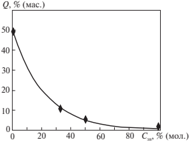

In [23]:
from docling_core.types.doc.document import PictureDescriptionData
from IPython import display

html_buffer = []
# display the first 5 pictures and their captions and annotations:
for pic in conv_result.document.pictures[:5]:
    html_item = (
        f"<h3>Picture <code>{pic.self_ref}</code></h3>"
        f'<img src="{pic.image.uri!s}" /><br />'
        f"<h4>Caption</h4>{pic.caption_text(doc=conv_result.document)}<br />"
    )
    for annotation in pic.annotations:
        if not isinstance(annotation, PictureDescriptionData):
            continue
        html_item += (
            f"<h4>Annotations ({annotation.provenance})</h4>{annotation.text}<br />\n"
        )
    html_buffer.append(html_item)
display.HTML("<hr />".join(html_buffer))

In [ ]:
def extract_text_from_pdf(pdf_path):
    """
    Extracts text from a PDF file and prints the first `num_chars` characters.

    Args:
    pdf_path (str): Path to the PDF file.

    Returns:
    str: Extracted text from the PDF.
    """
    # Open the PDF file
    mypdf = fitz.open(pdf_path)
    all_text = ""  # Initialize an empty string to store the extracted text

    # Iterate through each page in the PDF
    for page_num in range(mypdf.page_count):
        page = mypdf[page_num]  # Get the page
        text = page.get_text("text")  # Extract text from the page
        all_text += text  # Append the extracted text to the all_text string

    return all_text  # Return the extracted text